In [ ]:
file = open('/content/Premchand_tokens.txt','r',encoding='utf-8-sig')

In [ ]:
data = file.read().split()

In [ ]:
data[:12]

['िला',
 'बनारस',
 'बीरा',
 'नाम',
 'गाँव',
 'विधवा',
 'वृद्धा',
 'संतानहीन',
 'गोंड़िन',
 'जिसका',
 'भुनगी',
 'नाम']

Creating Model (Skip Gram)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Skip gram Model 
model = Word2Vec([data], min_count=1,size=500,sg=1)

In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['िला', 'बनारस', 'बीरा', 'नाम', 'गाँव', 'विधवा', 'वृद्धा', 'संतानहीन', 'गोंड़िन', 'जिसका', 'भुनगी', 'पास', 'धुर', 'जमीन', 'रहने', 'घर', 'जीवन', 'सहारा', 'केवल', 'भाड़', 'लोग', 'प्रायः', 'बेला', 'चबैना', 'सत्तू', 'निर्वाह', 'नित्य', 'भीड़', 'लगी', 'भुनाई', 'पाती', 'वही', 'भून', 'पीस', 'खा', 'लेती', 'झोंपड़ी', 'कोने', 'पड़', 'प्रातःकाल', 'उठती', 'चारों', 'ओर', 'झोंकने', 'सूखी', 'पत्तियाँ', 'बटोर', 'लाती', 'पत्तियों', 'बड़ा', 'ढेर', 'लगा', 'रहता', 'दोपहर', 'जलता', 'एकादशी', 'पूर्णमासी', 'दिन', 'प्रथानुसार', 'जमींदार', 'पंडित', 'उदयभान', 'पाँडे', 'दाने', 'भूनने', 'पड़ते', 'भूखे', 'रहना', 'पड़ता', 'जी', 'उससे', 'बेगार', 'भुनवाते', 'पानी', 'भरना', 'कभीकभी', 'हेतु', 'बन्द', 'प्रकार', 'लेने', 'अधिकार', 'अन्याय', 'नहीं', 'इतना', 'लेते', 'धारणा', 'खाने', 'कैसी', 'किसान', 'बैलों', 'भर', 'जोतने', 'शाम', 'खूँटे', 'भूखा', 'बाँध', 'दे', 'दयालुता', 'हित', 'चिन्ता', 'चिंता', 'क्योंकि', 'दोएक', 'भूखी', 'मर', 'दैवयोग', 'जगह', 'गोंड़', 'बड़ी', 'आसानी', 'बसाया', 'कृपा', 'बसाये', 'चैत', 'महीना', 'संक्रांति', 'पर्व', 

In [ ]:
len(model['भूख'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


500

 gettings embeddings in a list

In [ ]:
skip_gram_embeddings = []
for w in words:
  skip_gram_embeddings.append(model[(w)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
len(skip_gram_embeddings)

8857

In [ ]:
len(words)

8857

Moving embeddings to a tsv file


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(skip_gram_embeddings)
print(df)

           0         1         2    ...       497       498       499
0    -0.000045  0.000043 -0.000928  ...  0.000571  0.000904 -0.000894
1     0.000143 -0.000678 -0.000671  ... -0.000892 -0.000404  0.000002
2    -0.000086 -0.000291  0.000518  ... -0.001320 -0.000945 -0.000684
3     0.005200 -0.000967 -0.003165  ... -0.026359  0.000373 -0.010674
4     0.005307 -0.000500 -0.003349  ... -0.024537 -0.000687 -0.010598
...        ...       ...       ...  ...       ...       ...       ...
8852 -0.000764 -0.000036 -0.000794  ... -0.000102  0.000208 -0.000721
8853  0.000189  0.000270 -0.000516  ... -0.000191 -0.000791  0.000521
8854 -0.000871  0.000187 -0.000349  ... -0.000721  0.000523  0.000281
8855 -0.000566  0.000642  0.000932  ...  0.000552  0.000972 -0.000466
8856 -0.000747  0.000123  0.000847  ... -0.000627 -0.000673  0.000595

[8857 rows x 500 columns]


In [ ]:
df.to_csv('skip_gram_embeddings.tsv',sep='\t',index=False,header=None)

Vocab to tsv

In [ ]:
print(data[:25])

['िला', 'बनारस', 'बीरा', 'नाम', 'गाँव', 'विधवा', 'वृद्धा', 'संतानहीन', 'गोंड़िन', 'जिसका', 'भुनगी', 'नाम', 'पास', 'धुर', 'जमीन', 'रहने', 'घर', 'जीवन', 'सहारा', 'केवल', 'भाड़', 'गाँव', 'लोग', 'प्रायः', 'बेला']


In [ ]:
vocab = pd.DataFrame(data)
vocab.to_csv('Premchand_vocab.tsv',sep='\t',index=False,header=None)

CBOW Model


In [ ]:
model = Word2Vec([data], min_count=1,size=500,sg=0)

In [ ]:
words = list(model.wv.vocab)

Getting embeddings in a list

In [ ]:
cbow_embeddings = []
for w in words:
  cbow_embeddings.append(model[(w)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


List to df

In [ ]:
df = pd.DataFrame(cbow_embeddings)
print(df)

           0         1         2    ...       497       498       499
0     0.000669 -0.000934 -0.000897  ... -0.000716 -0.000683 -0.000090
1    -0.000141  0.000817 -0.000386  ... -0.000663  0.000630 -0.000655
2    -0.000164 -0.000590  0.000176  ...  0.000616  0.000178 -0.000592
3     0.000613 -0.000418  0.000044  ... -0.000631  0.000949  0.000474
4    -0.000744 -0.000227  0.000329  ...  0.000833  0.000560 -0.000083
...        ...       ...       ...  ...       ...       ...       ...
8852  0.000100 -0.000644  0.000300  ... -0.000482  0.000995  0.000119
8853 -0.000538  0.000328  0.000610  ...  0.000620 -0.000314 -0.000713
8854  0.000677 -0.000194 -0.000853  ...  0.000737  0.000190 -0.000047
8855 -0.000340 -0.000848  0.000108  ...  0.000698 -0.000830  0.000882
8856 -0.000985  0.000832 -0.000644  ... -0.000029 -0.000797  0.000146

[8857 rows x 500 columns]


In [ ]:
df.to_csv('cbow_embeddings.tsv',sep='\t',index=False,header=None)

In [ ]:
print(model['भूख'])

[-1.58920389e-04 -9.56541568e-04 -6.36019904e-05 -7.29482912e-04
  2.13611886e-04  3.42152111e-04  1.78393791e-04  6.23497763e-05
  8.32328515e-04  3.49250273e-04  8.92105629e-04 -6.63553423e-04
 -3.81084305e-04  1.86150567e-06  3.68518435e-04  8.83350440e-04
  4.22375015e-04  3.67284432e-04  6.83575752e-04 -2.30278965e-04
  9.46145039e-04 -8.39470245e-04 -7.78863265e-04 -3.62155872e-04
  4.77472349e-04 -5.89757401e-04 -1.00541758e-04  7.64766359e-04
 -4.90230508e-04  1.76791305e-04 -8.67493742e-04  1.92752210e-04
 -5.78398409e-04  1.21766032e-04 -2.78848689e-04 -1.91471947e-04
 -6.47338922e-04 -4.31545923e-04  4.76935034e-04 -4.34552261e-04
  5.85167669e-04  8.78937863e-05  2.36453488e-04  5.68573130e-04
 -8.39738816e-04 -4.70416417e-04  3.50248534e-04  5.01459523e-04
  6.84785075e-04  4.63746605e-04  3.60767182e-04 -8.09016128e-05
 -2.34929073e-04  5.61452063e-04 -4.36536677e-04 -6.16406091e-04
 -4.60970361e-04  3.01383669e-04 -6.82846701e-04  2.32931270e-05
 -6.17409067e-04  1.77307

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


**Word Cloud**

In [ ]:
!pip install wordcloud 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
file = open('//content/premchand.txt','r',encoding='utf-8-sig')
text=file.read()

In [ ]:
# stop words
stop = 

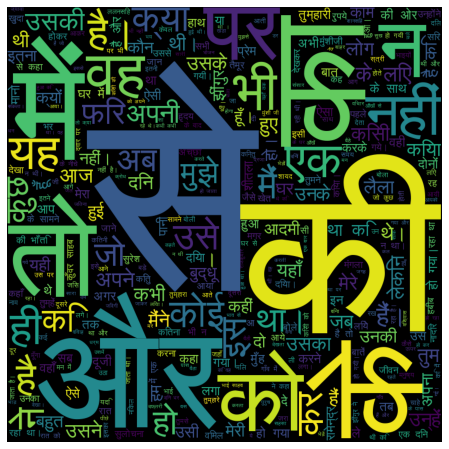

In [ ]:
font = 'gargi.ttf'
wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10, max_words = 1000,
                          background_color = 'black', 
                          font_path = font, regexp=r"[\u0900-\u097F]+").generate(text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
data.remove('नहीं')


In [ ]:
data.remove('न')
data.remove('और')
data.remove('न')
data.remove('न')
data.remove('न')
data.remove('न')
data.remove('न')
data.remove('न')
data.remove('न')